In [30]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
import math
from axes import axes 
# retina distplay
%matplotlib inline
# hidpi display
plt.rcParams['figure.dpi'] = 300
# turn on grid by default
plt.rcParams['axes.grid'] = True


In [31]:
## fourier transform of a plucked string, from Georgi
xvals = np.linspace(0, 1, 1000)

def target(xvals:np.ndarray) -> np.ndarray:
    """
    target function for fourier transform of plucked string
    """
    yvals = np.zeros_like(xvals)
    w = 0.75
    yvals[xvals < w] = xvals[xvals<w]
    yvals[xvals >= w] = w*(1-xvals[xvals>=w])/(1-w)
    return yvals


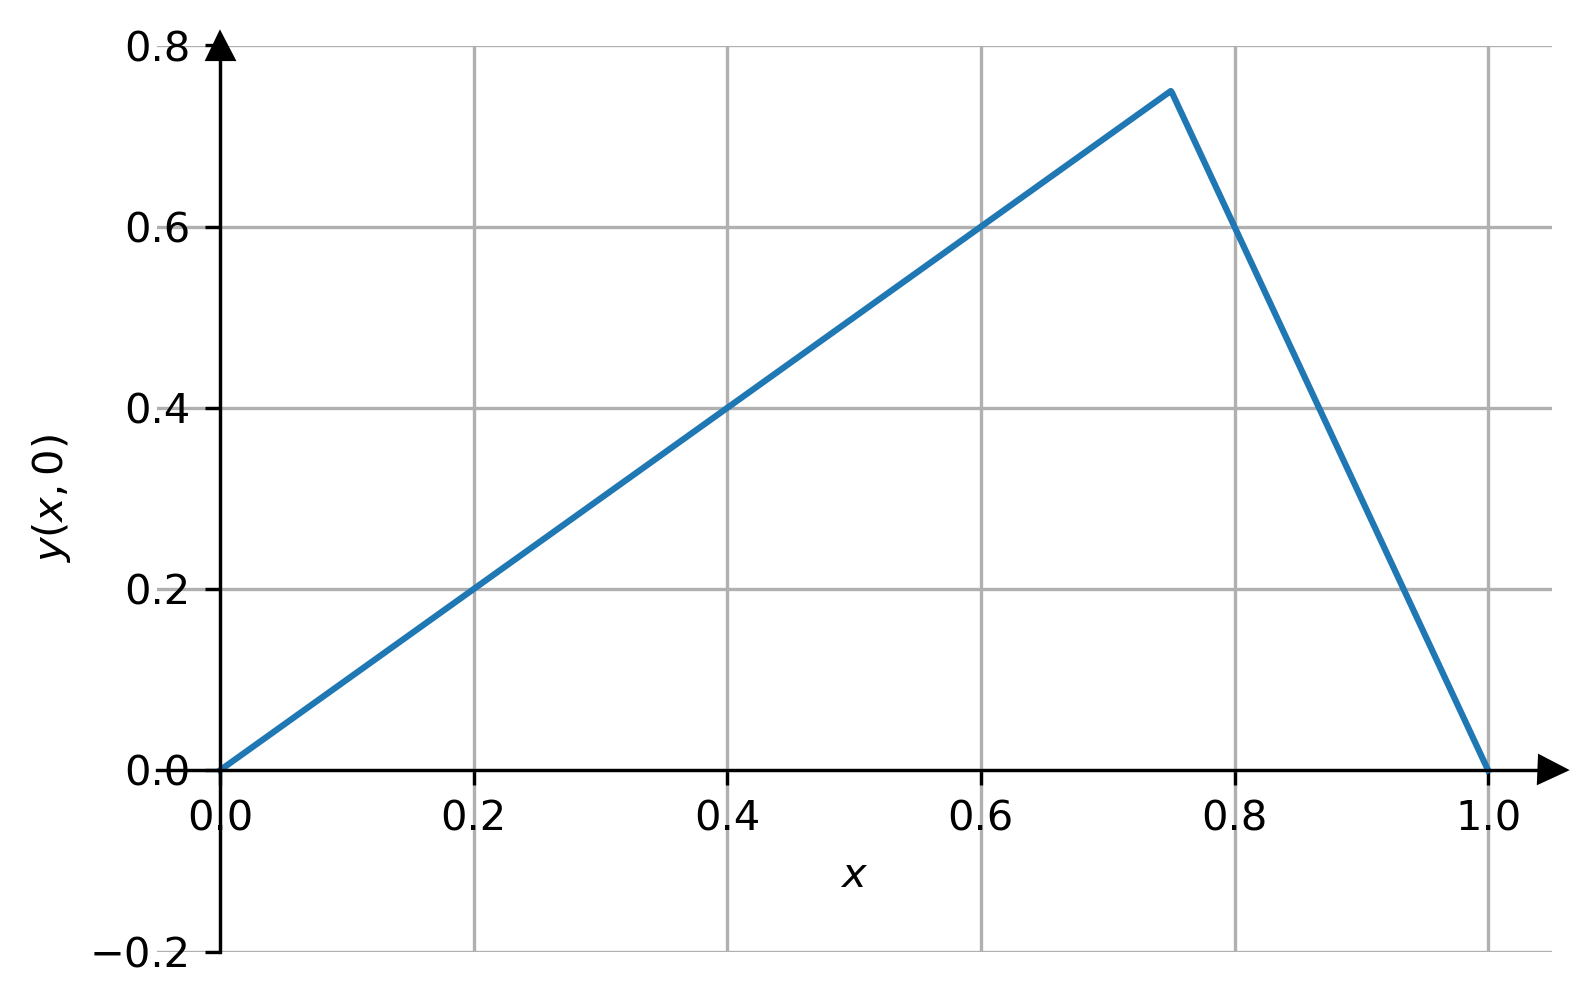

In [32]:
# plot target only
plt.plot(xvals, target(xvals))
plt.xlabel('$x$')
plt.ylabel('$y(x,0)$')
plt.ylim(-0.2, 0.8)
axes()
plt.savefig('plucked_string_only.png')

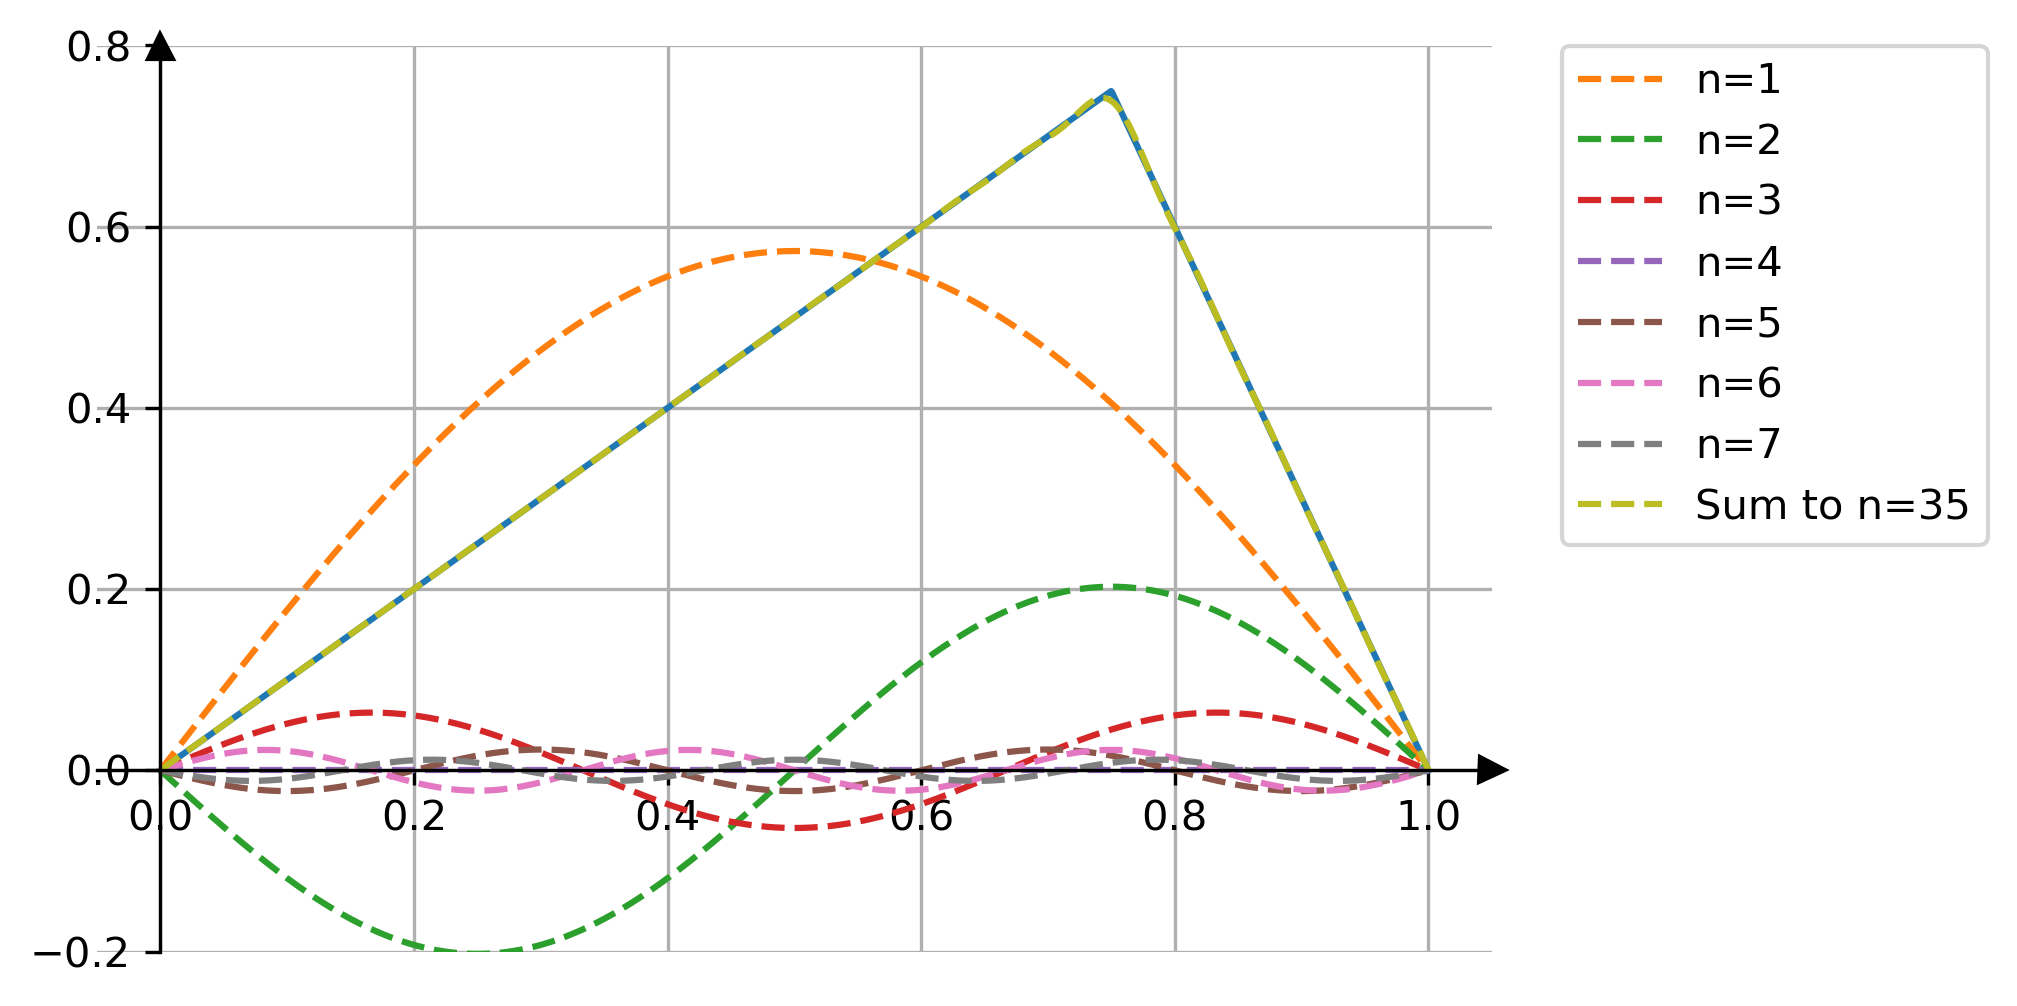

In [33]:
# set the list of contributions to the fourier series to use (1 to 35)
n = np.arange(1, 36)
#print(n)
w=0.75
l=1.0
# assign the fourier series coefficients
cn = 2*np.sin(n*np.pi*w)/((1-w)*n*n*np.pi*np.pi)

# print them out for debugging
#print(cn)

# initialize psi and contribs to have the right shapes
psi = np.zeros_like(xvals)
contribs = np.zeros_like(n)
# plot the target function
plt.plot(xvals, target(xvals))
# build the fourier series for all n contributions, and plot the first 7
for nval in n:
    contrib = cn[nval-1] * np.sin(nval*np.pi*xvals/(l))
    if ( nval < 8 ):
        plt.plot(xvals, contrib, '--', label=f'n={nval}')
    psi += contrib

# plot the sum of the contributions, i.e., the full series
axes()
plt.plot(xvals, psi, '--', label=f'Sum to n={np.max(n)}')
plt.ylim(-0.2, 0.8)

# add a plot legend and save the plot to a png file
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('plucked_string.png', bbox_inches="tight")


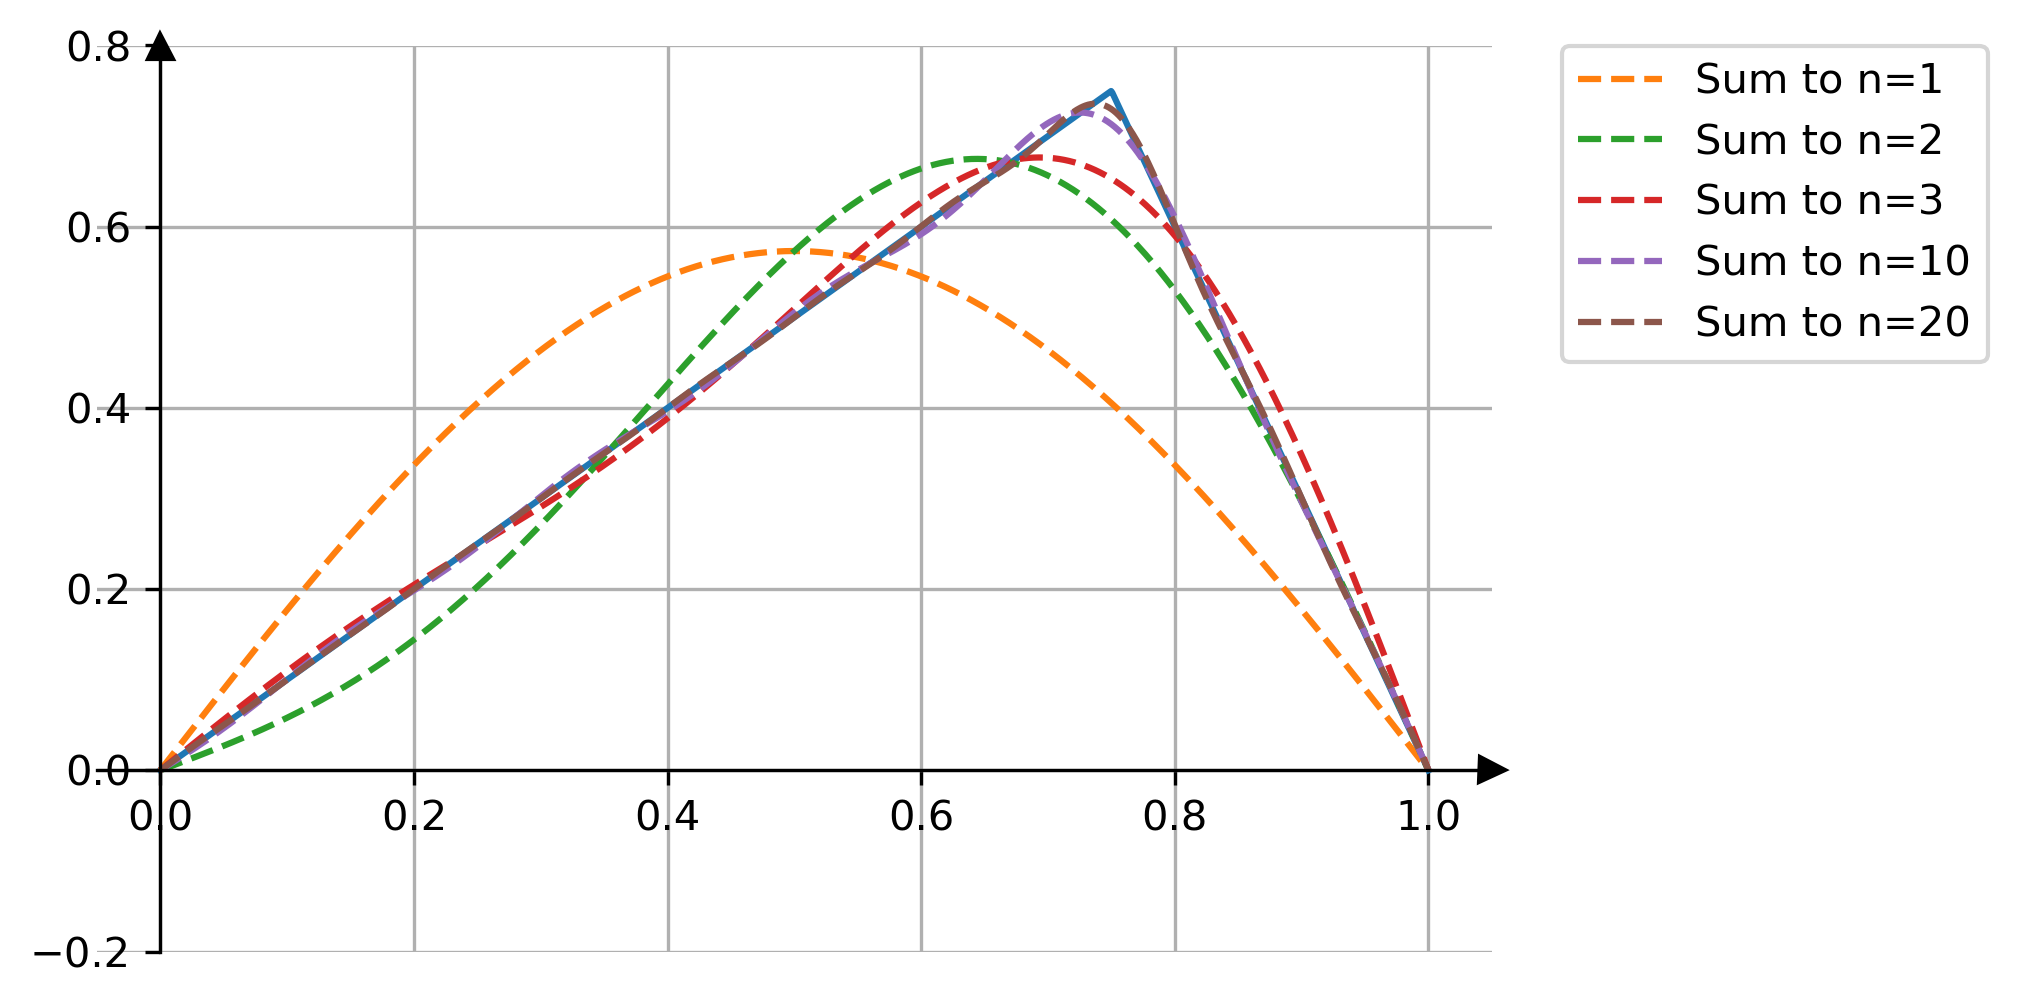

In [34]:
# now plot the partial sums of the Fourier series
n = np.arange(1, 36)
nsel = np.array([1,2,3,  10, 20])

#print(n)
w=0.75
l=1.0
cn = 2*np.sin(n*np.pi*w)/((1-w)*n*n*np.pi*np.pi)

#print(cn)

psi = np.zeros_like(xvals)
contribs = np.zeros_like(n)
plt.plot(xvals, target(xvals))
for nval, c in np.nditer([n, cn]):
    contrib = c * np.sin(nval*np.pi*xvals/(l))
    psi += contrib
    if ( nval in nsel ):
        plt.plot(xvals, psi, '--', label=f'Sum to n={nval}')

axes()
plt.ylim(-0.2, 0.8)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('plucked_string_partialsums.png', bbox_inches="tight")


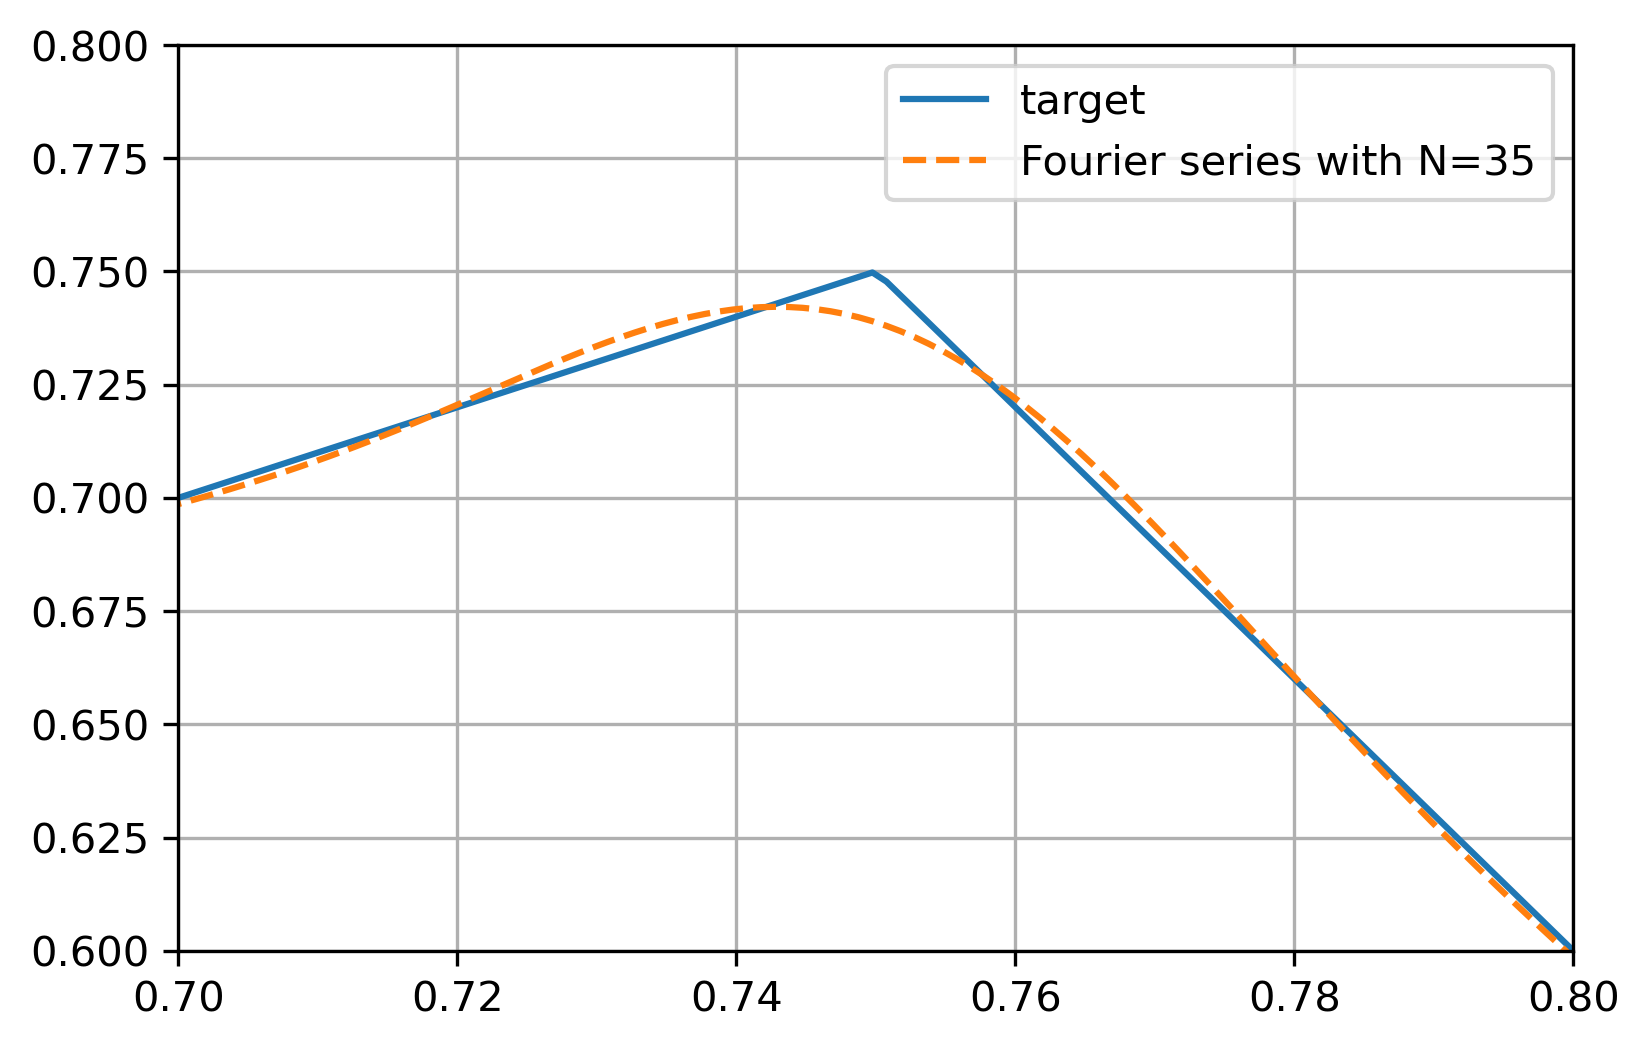

In [35]:
# zoom in on region near w=0.75
plt.xlim(0.7, 0.8)
plt.ylim(0.6, 0.8)
plt.plot(xvals, target(xvals), label='target')
plt.plot(xvals, psi, '--', label=f'Fourier series with N={np.max(n)}')
plt.legend()
plt.savefig('plucked_string_zoom.png')

/var/folders/30/2kfdtt9d3m554dnpxtp5g3y40000gp/T/ipykernel_23002/224343829.py:2: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(xvals, 100*(target(xvals)-psi)/target(xvals), '--', label=f'$\delta$ for $N=${np.max(n)}')
/var/folders/30/2kfdtt9d3m554dnpxtp5g3y40000gp/T/ipykernel_23002/224343829.py:2: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(xvals, 100*(target(xvals)-psi)/target(xvals), '--', label=f'$\delta$ for $N=${np.max(n)}')


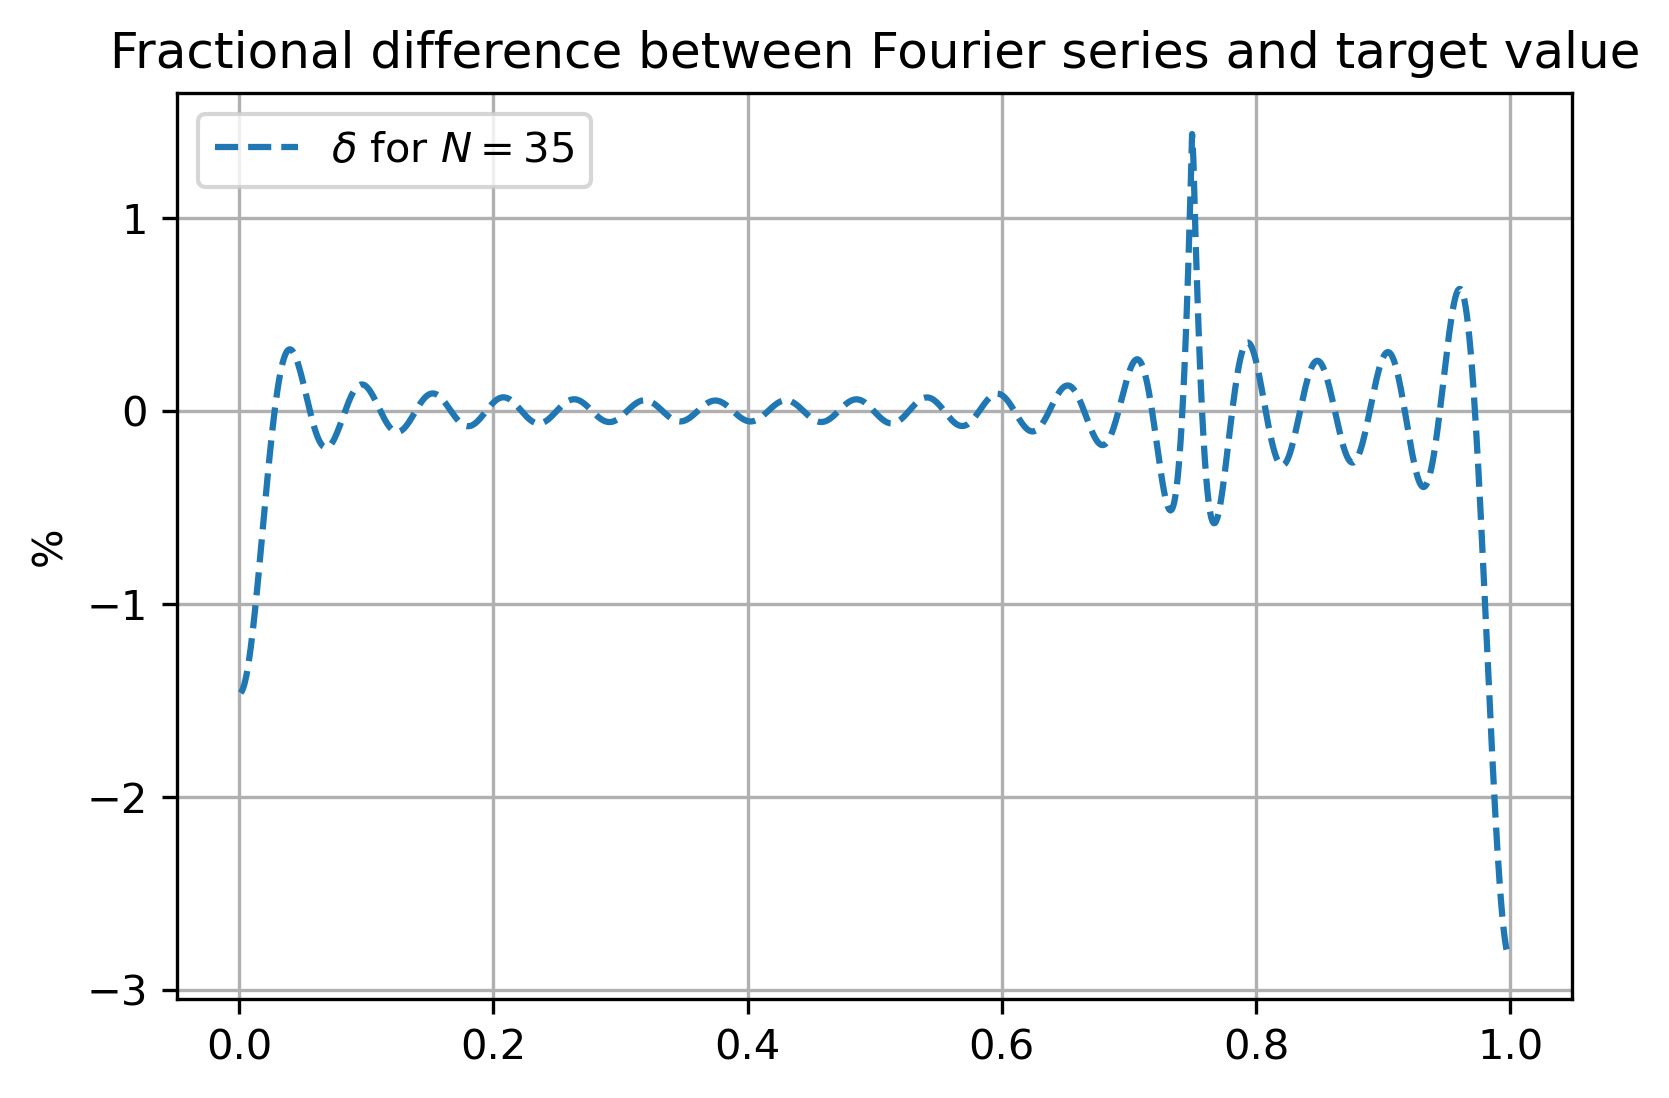

In [36]:
# diffference between target and fourier series
plt.plot(xvals, 100*(target(xvals)-psi)/target(xvals), '--', label=f'$\delta$ for $N=${np.max(n)}')
plt.title('Fractional difference between Fourier series and target value')
plt.ylabel('%')
plt.legend()
plt.savefig('plucked_string_diff.png')

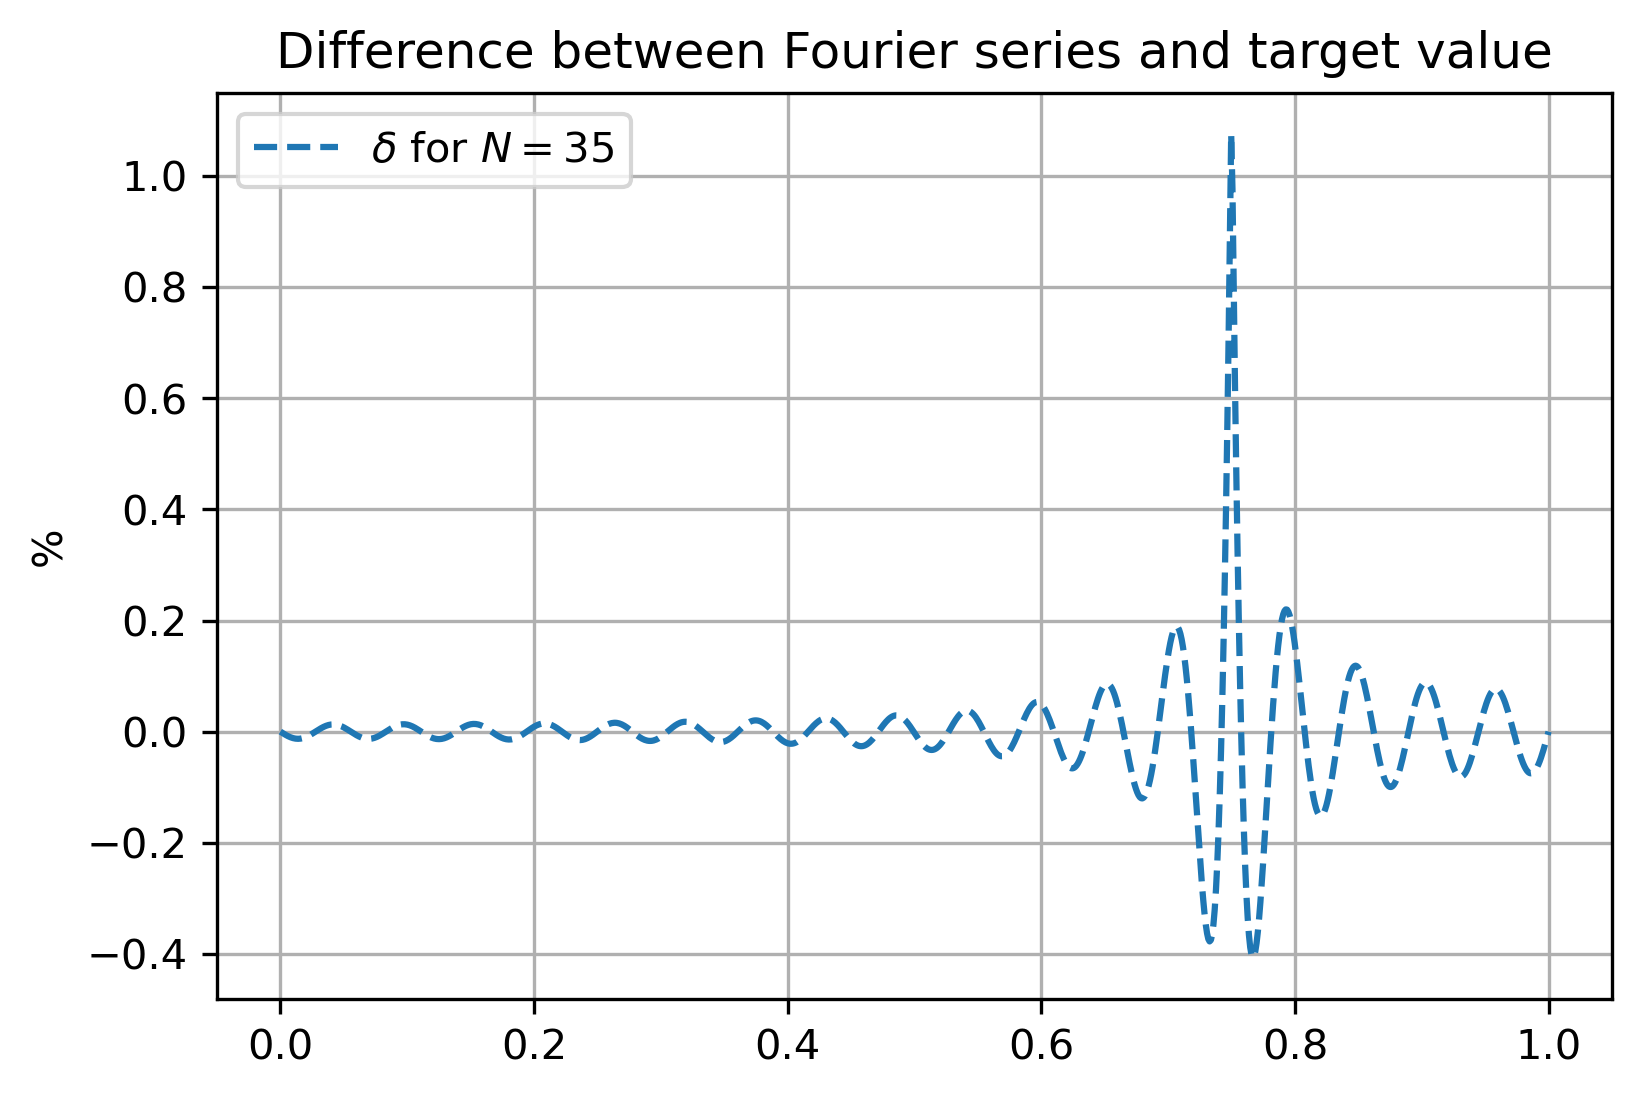

In [37]:
# diffference between target and fourier series
plt.plot(xvals, 100*(target(xvals)-psi), '--', label=f'$\delta$ for $N=${np.max(n)}')
plt.title('Difference between Fourier series and target value')
plt.ylabel('%')
plt.legend()
plt.savefig('plucked_string_diff_abs.png')

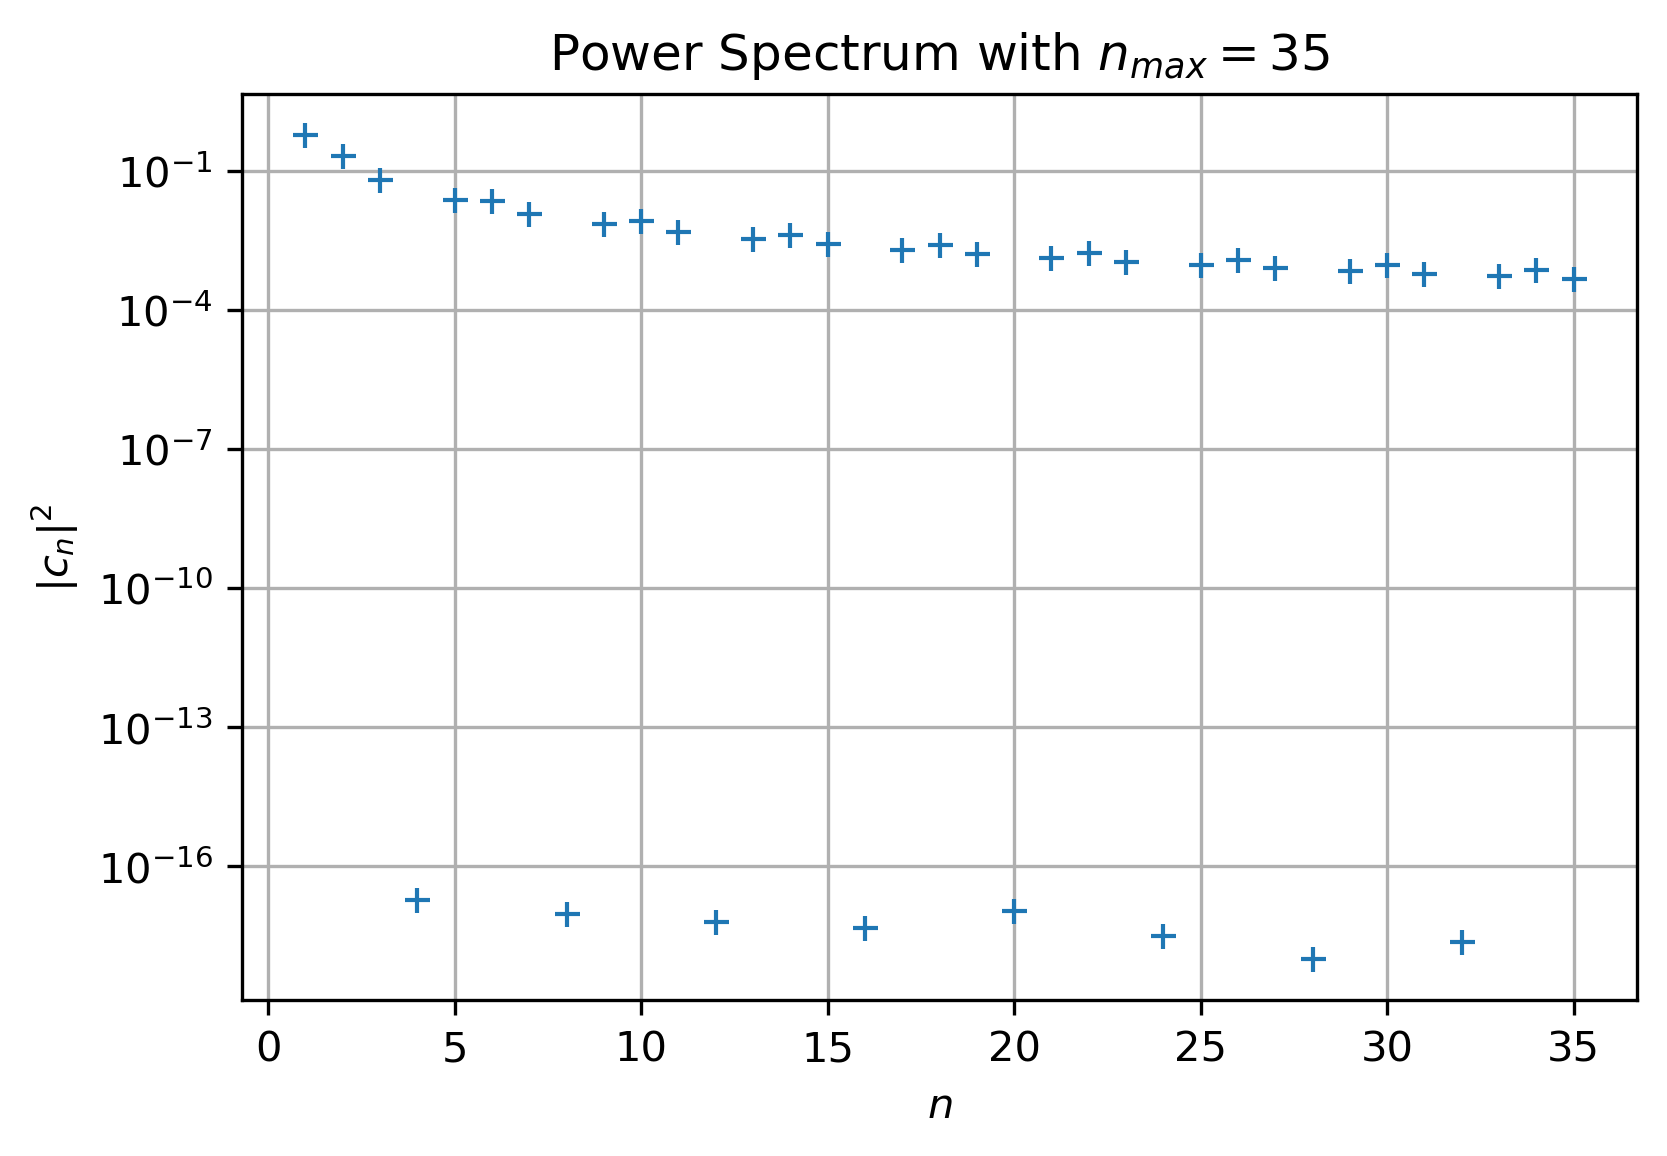

In [38]:
# semilog plot
plt.semilogy(n, np.abs(cn), '+')
plt.title(r'Power Spectrum with $n_{max}='+f'{np.max(n)}$')
plt.xlabel(r'$n$')
plt.ylabel(r'$\left|c_n\right|^2$')
plt.savefig('plucked_string_power.png')

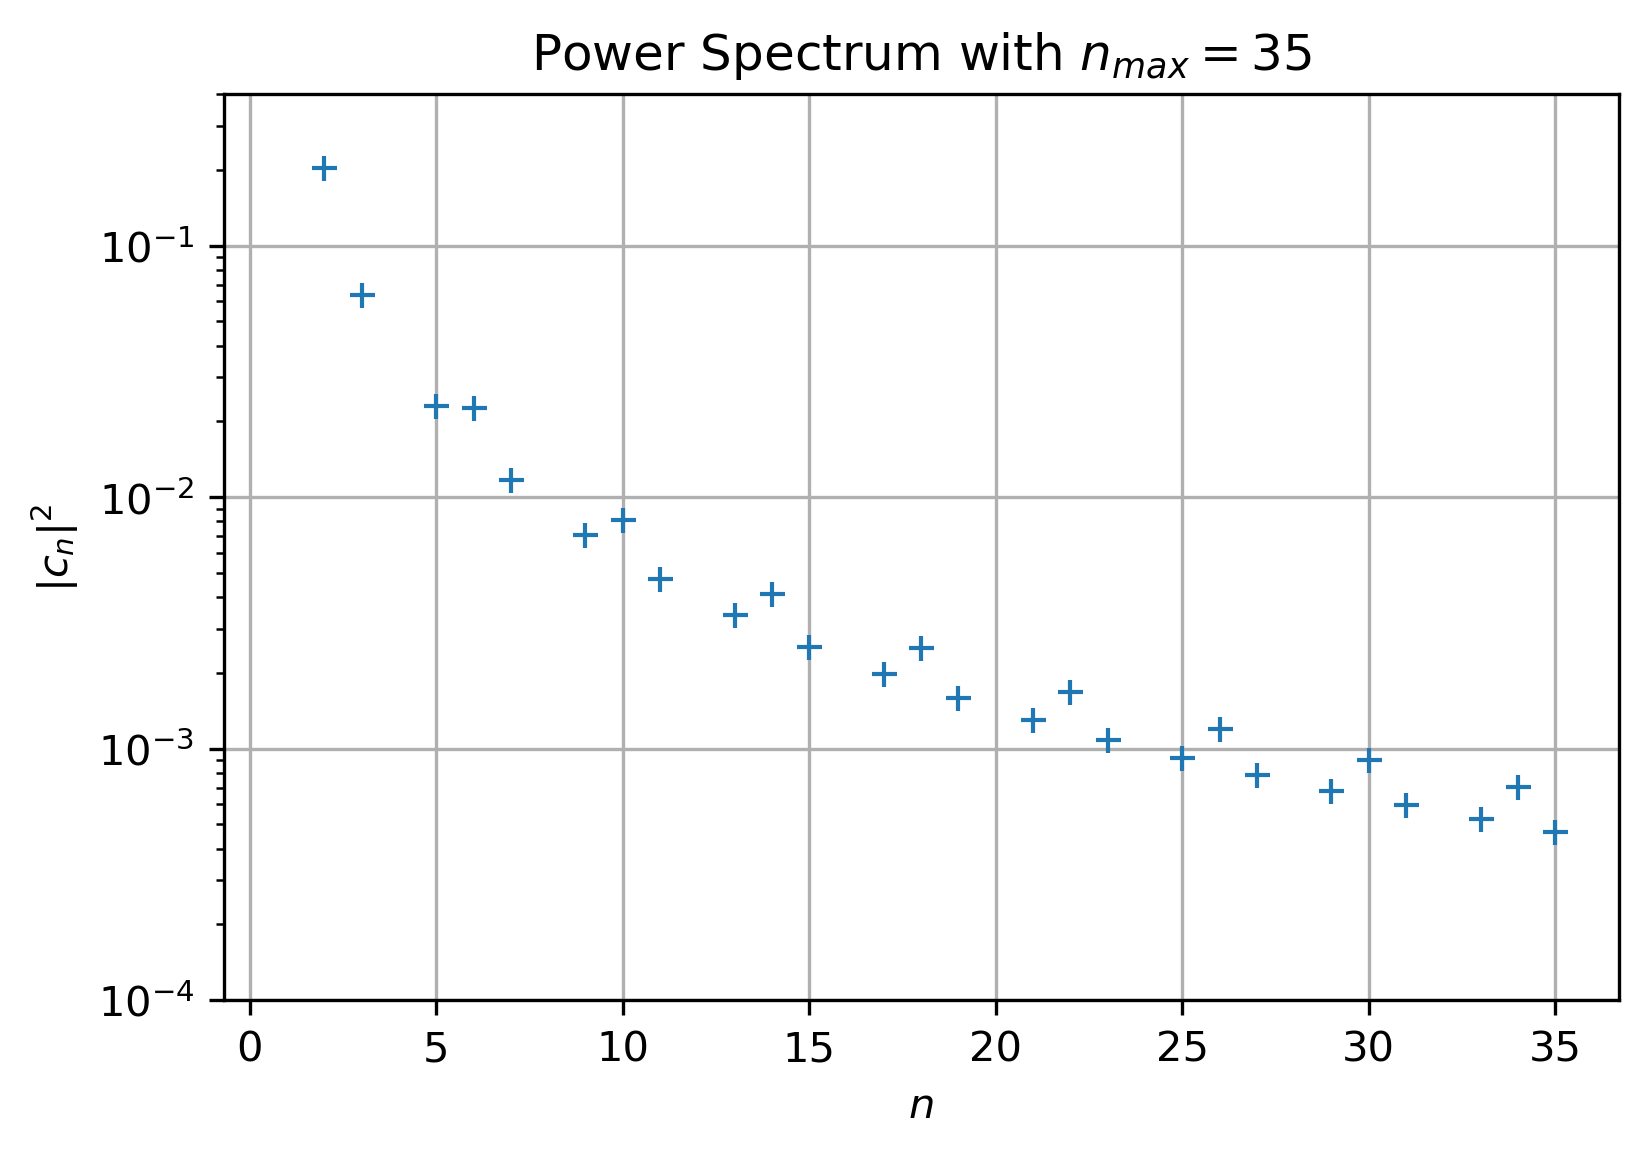

In [39]:
# semilog plot
plt.semilogy(n, np.abs(cn), '+')
plt.title(r'Power Spectrum with $n_{max}='+f'{np.max(n)}$')
plt.xlabel(r'$n$')
plt.ylim(0.0001, .4)
plt.ylabel(r'$\left|c_n\right|^2$')
plt.savefig('plucked_string_power_zoom.png')

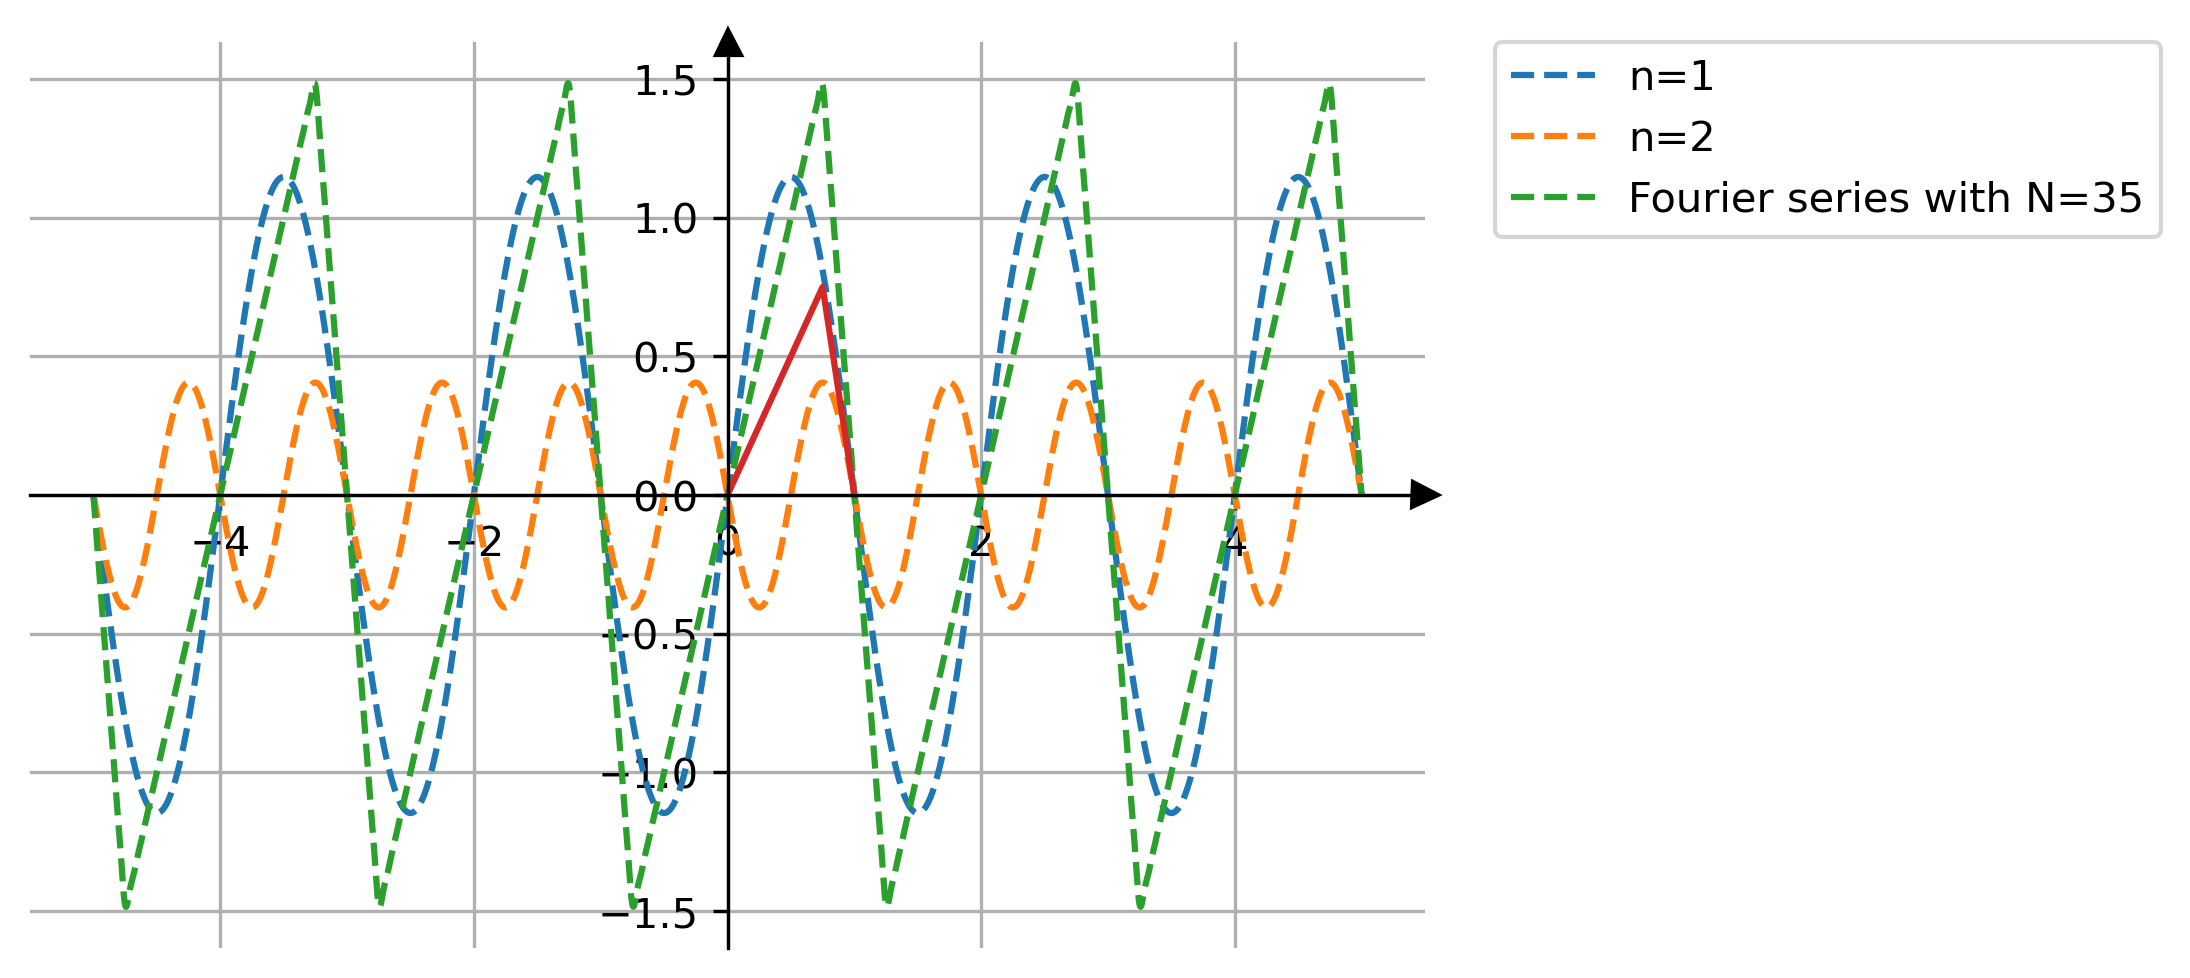

In [40]:
xvals_long = np.linspace(-5,5,5000)
target_long = target(xvals_long)
psi_long = np.zeros_like(xvals_long)
contribs = np.zeros_like(n)
for nval in n:
    contrib = 2*cn[nval-1] * np.sin(nval*np.pi*xvals_long/(l))
    if (nval < 3):
        plt.plot(xvals_long, contrib, '--', label=f'n={nval}')
    psi_long += contrib

axes()
#plt.plot(xvals_long, target_long)
plt.plot(xvals_long, psi_long, '--', label=f'Fourier series with N={np.max(n)}')
plt.plot(xvals, target(xvals))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('plucked_string_long.png',bbox_inches="tight")
